In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [34]:
#read the data set 
df=pd.read_csv('Bank Data.csv')
df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
#check whether there is missing value
df.isnull().sum()

age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

There is no missing value.

The goal for this task is to improve classificatiom to predict which customers would say yes. First, we can visually explore the data set

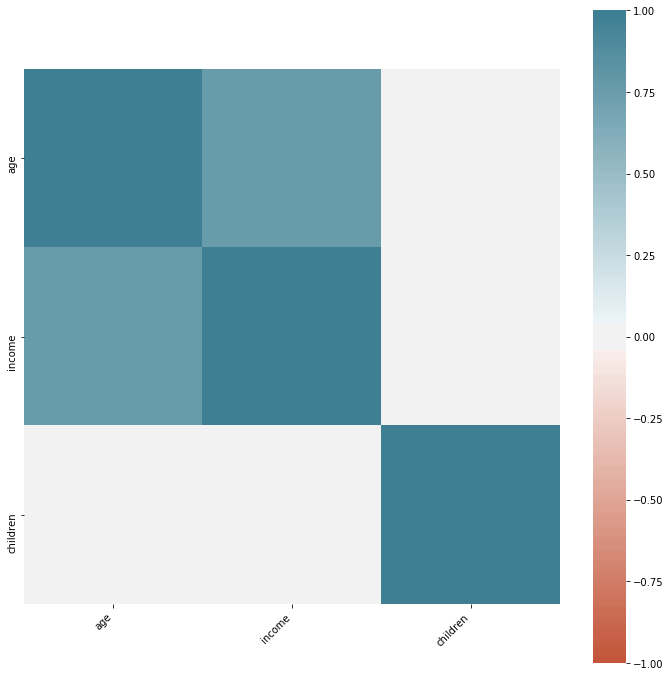

In [5]:
#plot correalations between variables
sub_data = df
corr = sub_data.corr()
fig,ax =plt.subplots()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
fig.set_size_inches(12,12)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The correlation plot show that age and income are correlated positively. But age and children, and income and children has no correlations. Other attributes including the target varibale are categorical data, which are hard to visualized.

In [32]:
#encode categorical data
import category_encoders as ce
ohe= ce.OneHotEncoder()
X = df.iloc[:, 0:10]
X_encoded = ohe.fit_transform(X)

In [7]:
#encode target variables
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,10]
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

In [33]:
#check whether it is a balanced data set
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_encoded)))

Original dataset shape Counter({0: 326, 1: 274})


It is a balanced data set, we can contiune building models

In [8]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded)

In [9]:
#train decision tree and obtain accuracy score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pre_dt = dt.predict(X_test)
dt_sco = accuracy_score(y_test, y_pre_dt)
print ('Decision tree accuracy: %.2f'%dt_sco)

Decision tree accuracy: 0.85


In [10]:
#train random forest and obtain accuracy score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)
y_pre_rf = rf.predict(X_test)
rf_sco = accuracy_score(y_test, y_pre_rf)
print ('Random Forest accuracy: %.2f'%rf_sco)

Random Forest accuracy: 0.83


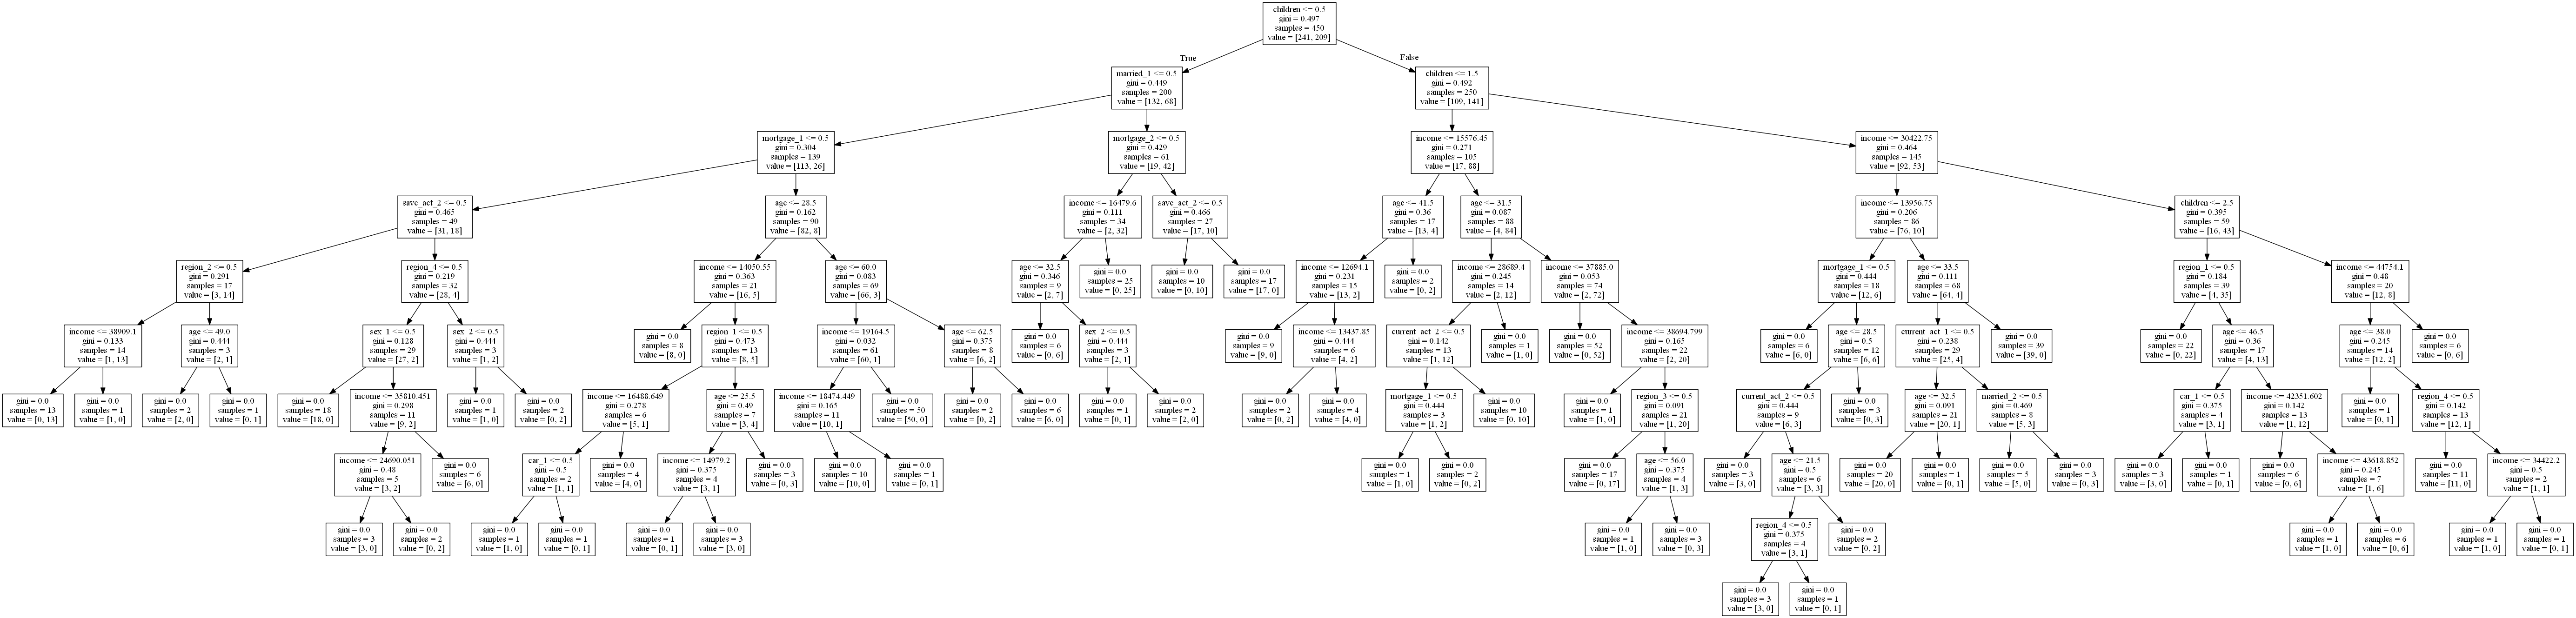

In [17]:
#graph decision tree model
from graphviz import Source
from IPython.display import SVG
from sklearn import tree
from IPython.display import Image

feature_names=X_train.columns.values.tolist()
graph = Source(tree.export_graphviz(dt, out_file=None, feature_names=feature_names))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
Image(png_bytes)

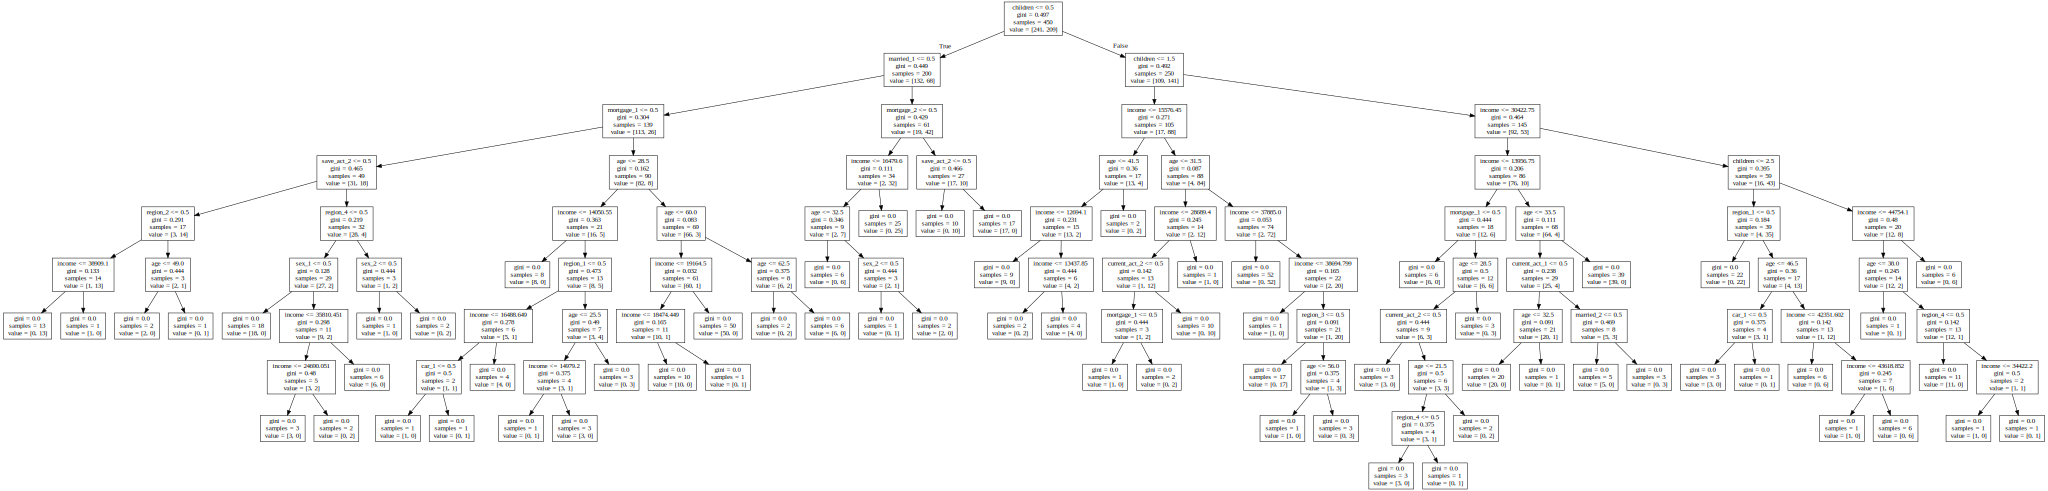

In [18]:
#view larger image
SVG(graph.pipe(format='svg'))

Since I used default model, the decision tree looks large, with ten layers in total. The performance (accuracy score) is 0.85. The first split is children <= 0.5, which is a little bit strange, since it could not have 0.5 number of children.    

In [20]:
#confusion matrics for random forest
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pre_rf),
    columns=['Predicted Don\'t Pep', 'Predicted pep'],
    index=['True Don\'t pep', 'True pep']
)

,Predicted Don't Pep,Predicted pep
True Don't pep,69,16
True pep,10,55


The confusion matrix is shown above, where we can see that both TP and TN are higher than NP and NT, suggesting that the model performance is not bad.